In [9]:
import pandas as pd
df=pd.read_csv('train.csv')

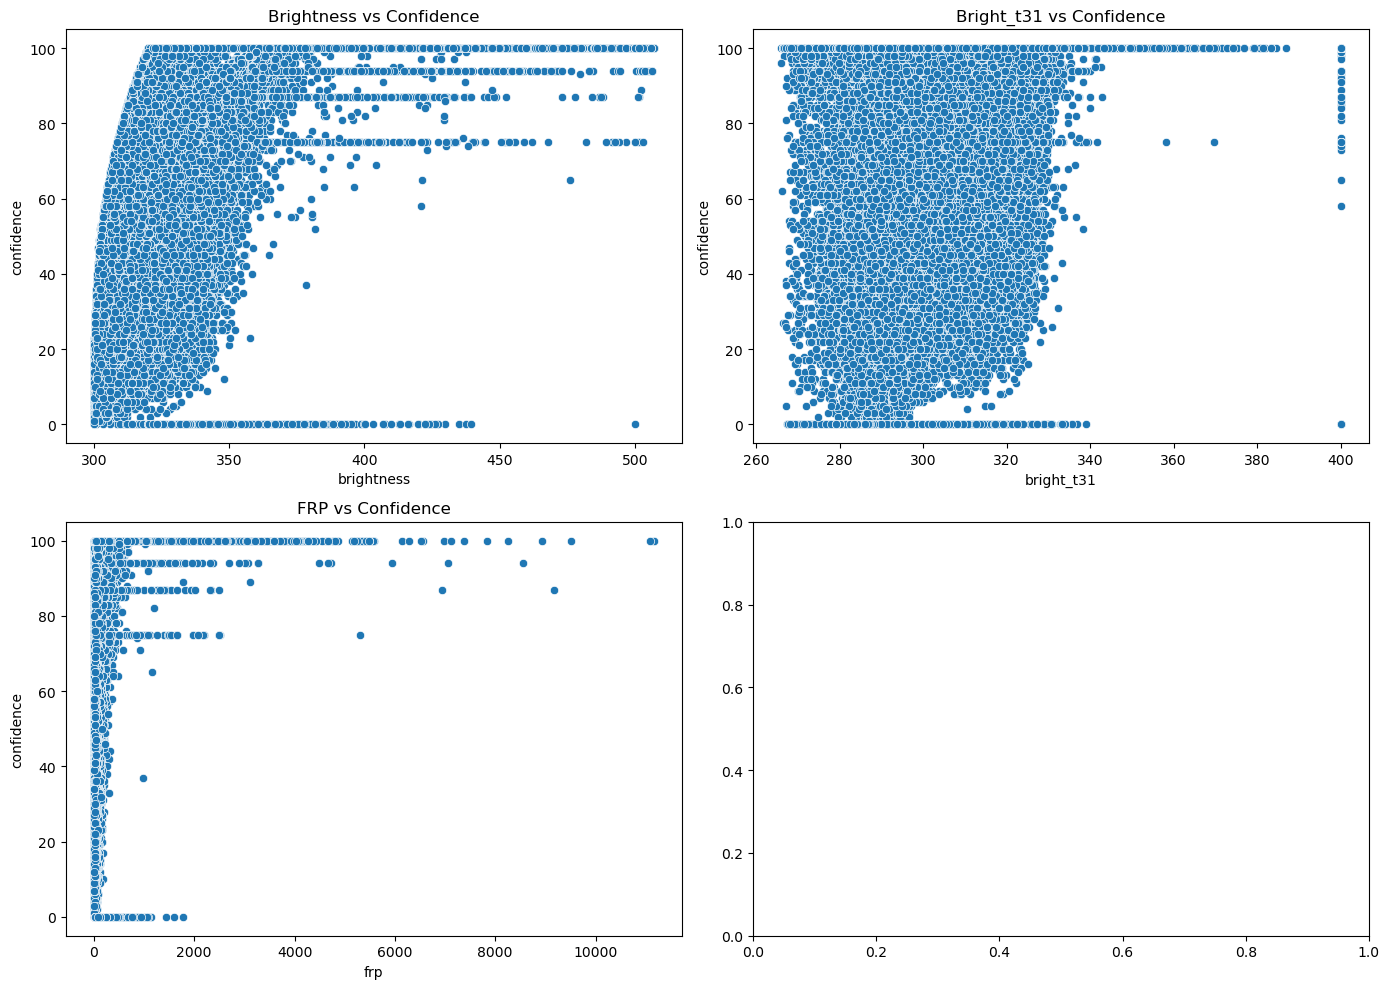

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x='brightness', y='confidence', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Brightness vs Confidence')
sns.scatterplot(x='bright_t31', y='confidence', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Bright_t31 vs Confidence')
sns.scatterplot(x='frp', y='confidence', data=df, ax=axs[1, 0])
axs[1, 0].set_title('FRP vs Confidence')

plt.tight_layout()
plt.show()

In [13]:
df=df.drop(['acq_date'],axis=1)

In [ ]:
y=df['confidence']
X=df.drop(['instrument','version','scan','confidence'],axis=1)
X.satellite=X.satellite.map({'Terra':1,'Aqua':2})
X.daynight=X.daynight.map({'D':1,'N':2})
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50)
model.fit(X,y)

In [ ]:
X_test=pd.read_csv('test.csv')
X_test.satellite=X_test.satellite.map({'Terra':1,'Aqua':2})
X_test.daynight=X_test.daynight.map({'D':1,'N':2})
X_test=X_test.drop(['acq_date','instrument','scan','version'],axis=1)
confidence=model.predict(X_test)
ID=X_test['id']
df1={'id':ID,'confidence':confidence}

da=pd.DataFrame(df1)
da.to_csv('MLtask.csv',index=False)